In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

C:\Users\hanna\AppData\Local\Temp\ipykernel_8992\1472696751.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


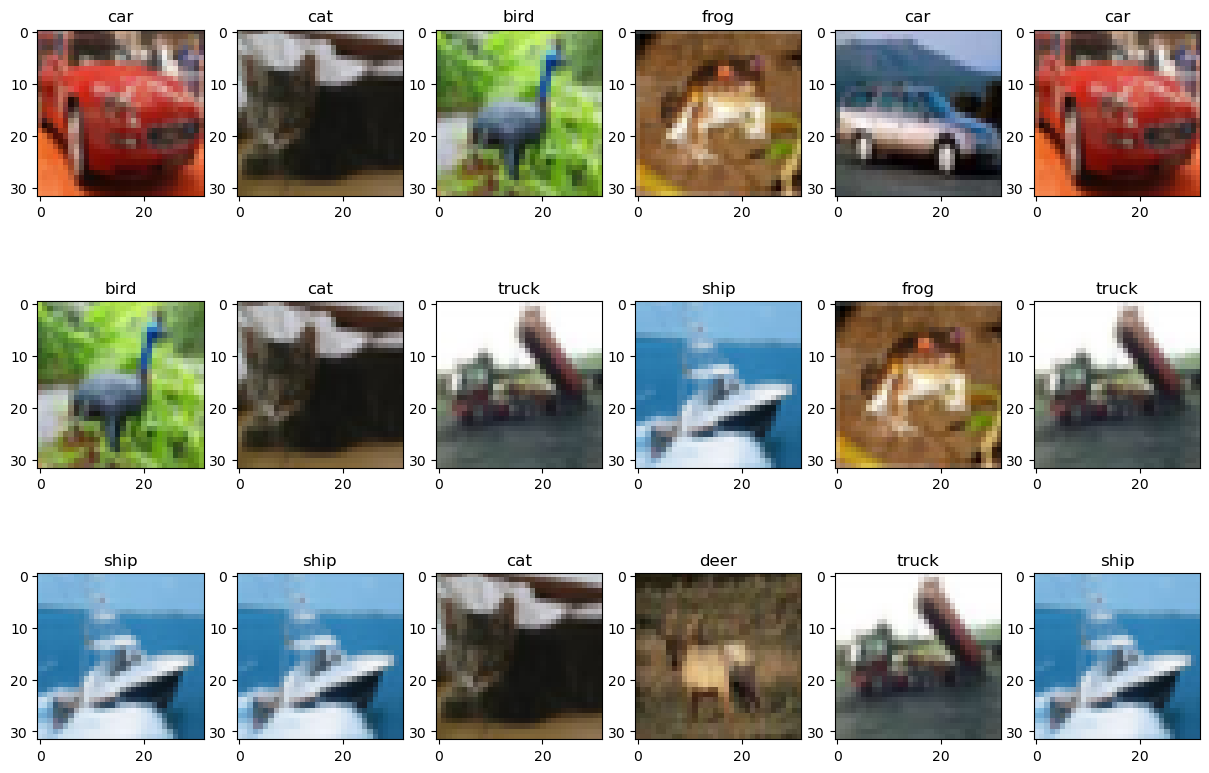

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):    
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, num_classes)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

dict_values(['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])


(Text(0.5, 0, 'Classes'), Text(0, 0.5, 'Counts'))

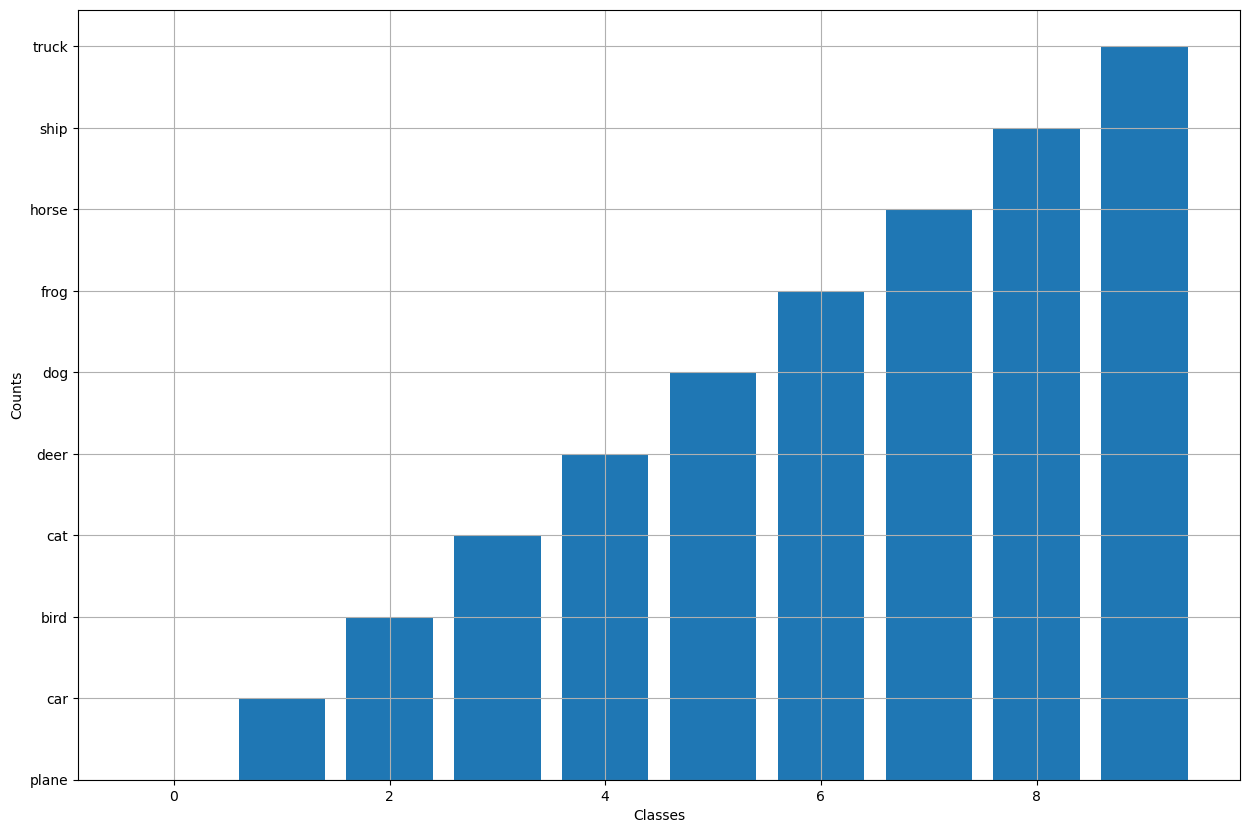

In [3]:
from collections import Counter
hist = Counter(classes)
print(hist.values())

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Classes'), plt.ylabel('Counts')

In [4]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


In [5]:
# Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu")(net) # new
net = MaxPooling2D(pool_size=(2, 2))(net) # new
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

# Build the classifier
model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,210 (184.41 KB)

 Trainable params: 47,210 (184.41 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compile the model and train it.

#epochs = 25
epochs = 35
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/35
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.2782 - loss: 1.9597 - val_accuracy: 0.4268 - val_loss: 1.6545
Epoch 2/35
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.4823 - loss: 1.4489 - val_accuracy: 0.5000 - val_loss: 1.4220
Epoch 3/35
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.5406 - loss: 1.2973 - val_accuracy: 0.5546 - val_loss: 1.2649
Epoch 4/35
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5797 - loss: 1.2001 - val_accuracy: 0.5982 - val_loss: 1.1718
Epoch 5/35
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6042 - loss: 1.1292 - val_accuracy: 0.6168 - val_loss: 1.1189
Epoch 6/35
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6269 - loss: 1.0743 - val_accuracy: 0.6342 - val_loss: 1.0814
Epoch 7/35
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6413 - loss: 1.0285 - val_accuracy: 0.6420 - val_loss: 1.0491
Epoch 8/35
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.6558 - loss: 0.9900 - val_acc

Train Acc      0.8092444539070129
Validation Acc 0.6733999848365784


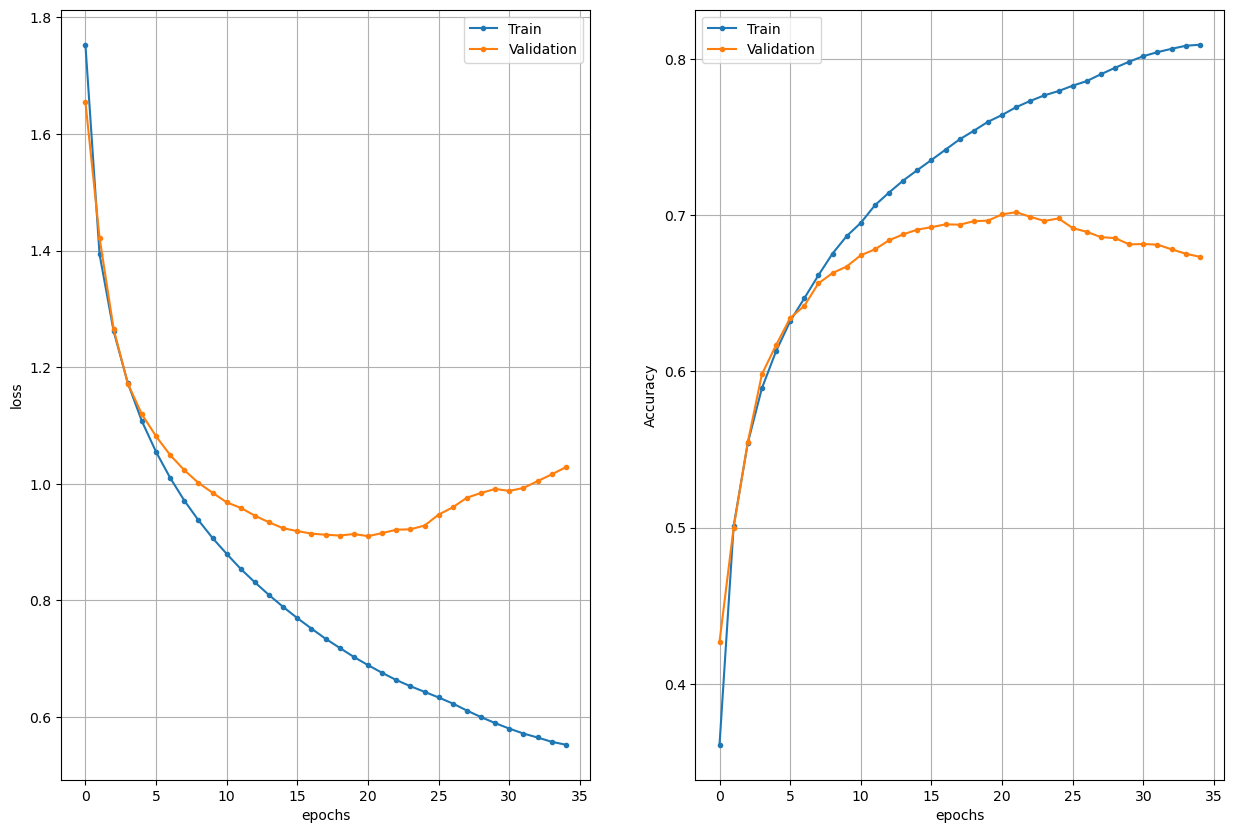

In [7]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

In [8]:
# In this step, you have to calculate the accuracies and visualize some random samples. 
#For the evaluation, you are going to use the test split from the dataset.

# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax((model.predict(x_test)), axis=1)

# Compute and print the accuracy for each class
for class_id, class_name in classes.items():
    mask = y_true == class_id
    acc = np.sum(y_pred[mask] == class_id) / np.sum(mask)
    print(class_name, acc)   

"""
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
plane 0.727
car 0.841
bird 0.508
cat 0.388
deer 0.704
dog 0.589
frog 0.793
horse 0.735
ship 0.697
truck 0.695
"""

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
plane 0.73
car 0.818
bird 0.579
cat 0.506
deer 0.727
dog 0.593
frog 0.762
horse 0.644
ship 0.679
truck 0.707


'\n313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step\nplane 0.727\ncar 0.841\nbird 0.508\ncat 0.388\ndeer 0.704\ndog 0.589\nfrog 0.793\nhorse 0.735\nship 0.697\ntruck 0.695\n'

In [9]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

#313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6666 - loss: 0.9813
#Test loss   0.9895779490470886
#Test metric 0.6676999926567078

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6781 - loss: 1.0372
Test loss   1.0458904504776
Test metric 0.6744999885559082


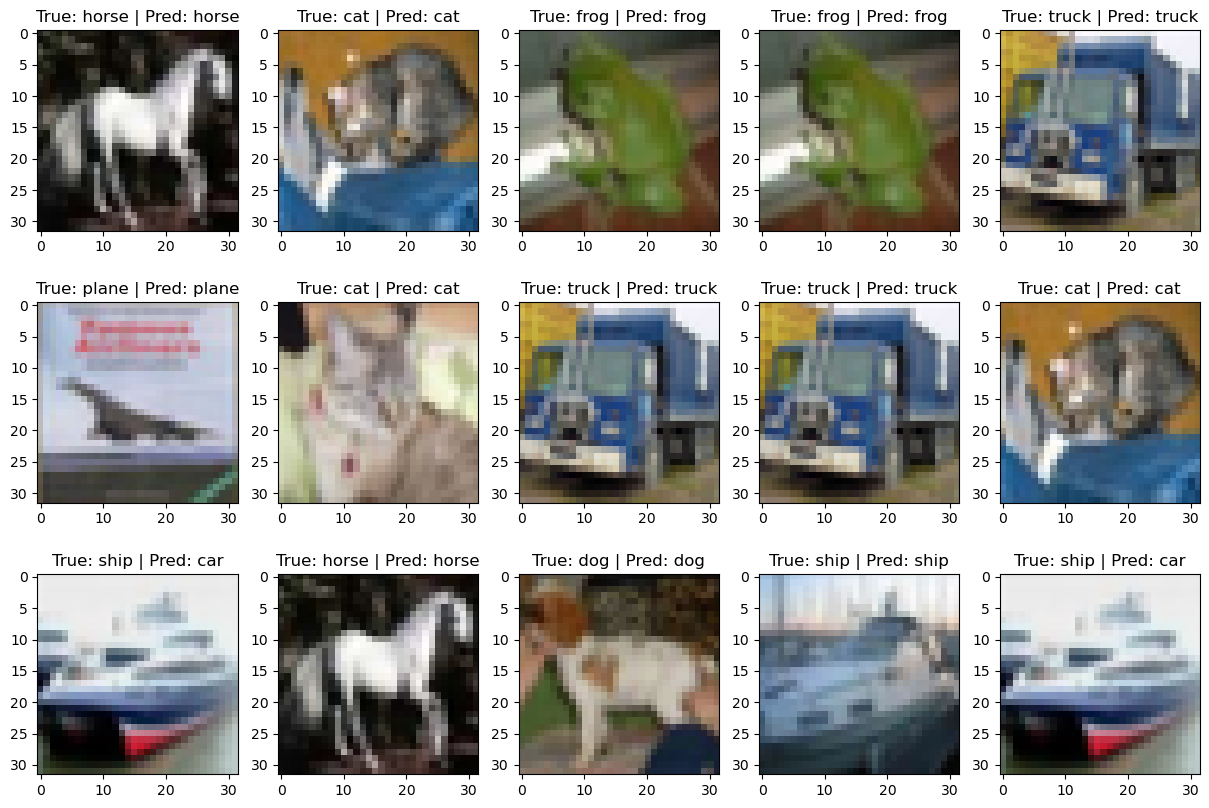

In [10]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, 15)

    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[y_true[idx]]) + ' | Pred: ' + str(classes[y_pred[idx]]))

What is the overall accuracy of the classifier? - it is the accuracy of performance of the trained model on the test dataset
What modifications would you do in order to improve the classification accuracy? - we can add more epochs, more layers, we can take generally more images so the model will have more data to learn on 
Make one modification (that you think can help) and train the classifier again. Does the accuracy improve?
i put: epochs = 35 and added
net = Conv2D(128, kernel_size=(3, 3), activation="relu")(net) # new
net = MaxPooling2D(pool_size=(2, 2))(net) # new


Before change:
#313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6666 - loss: 0.9813
#Test loss   0.9895779490470886
#Test metric 0.6676999926567078

After change:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6781 - loss: 1.0372
Test loss   1.0458904504776
Test metric 0.6744999885559082

